In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))


mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]


#### Step 1. 載入與查看資料基本形狀

In [4]:
df_summary = pd.DataFrame({
    'area' : area,
    'bedrooms' : bedrooms,
    'age' : area,
    'rent' : rent,
    'noise' : noise
})

print('====== summary Statistics ======')
display(df_summary.describe().T)

====== summary Statistics ======


,count,mean,std,min,25%,50%,75%,max
area,500.0,29.942468,11.947536,10.202463,19.651188,30.526550,40.244995,49.718592
bedrooms,500.0,1.984000,1.018734,0.000000,1.000000,2.000000,3.000000,4.000000
age,500.0,29.942468,11.947536,10.202463,19.651188,30.526550,40.244995,49.718592
rent,500.0,41.887497,20.744111,-4.676215,25.967532,42.268421,58.988953,84.412864
noise,500.0,0.165908,1.987650,-5.842701,-1.162324,0.126154,1.479263,6.386215


### Step 2. 各特徵分佈圖

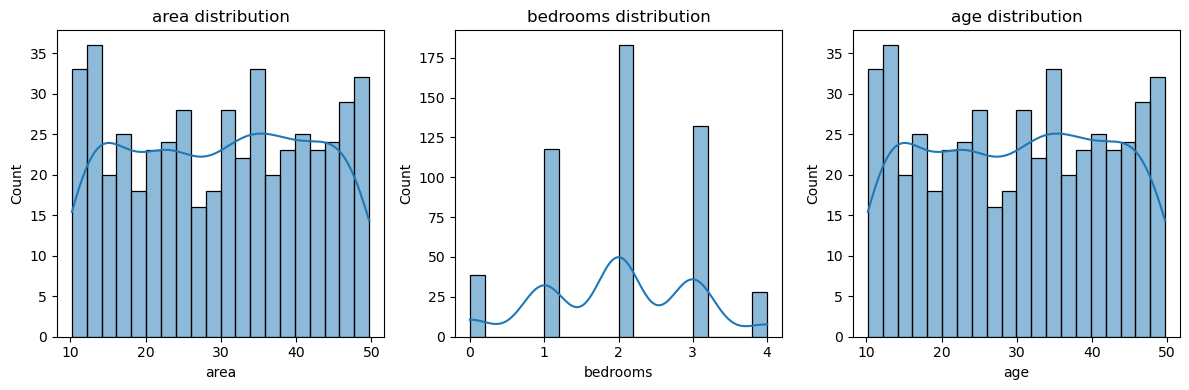

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
for i, col in enumerate(['area', 'bedrooms', 'age']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_summary[col], kde = True, bins = 20)
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.savefig('eda1.png', dpi = 720, bbox_inches = 'tight')
plt.show()

### Step 3. Correlation heatmap

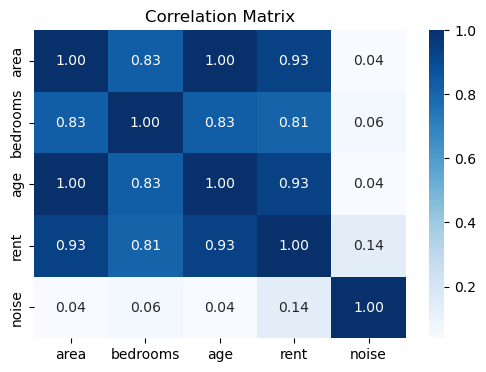

In [6]:
plt.figure(figsize = (6, 4))
sns.heatmap(df_summary.corr(), annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Correlation Matrix')
plt.savefig('eda2.png', dpi = 720)
plt.show()

### Step 4. Rent vs each feature (散佈圖)

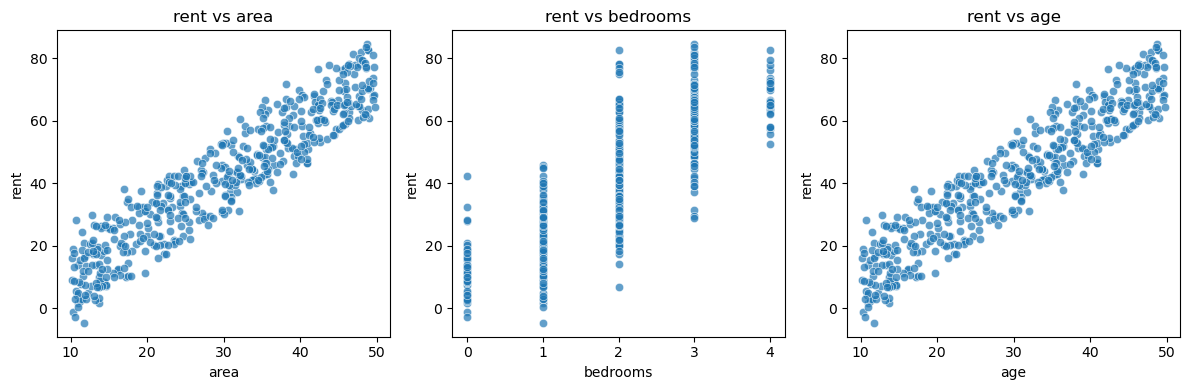

In [7]:
plt.figure(figsize = (12, 4))
for i, col in enumerate(['area', 'bedrooms', 'age']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x = df_summary[col], y = df_summary['rent'], alpha = 0.7)
    plt.title(f'rent vs {col}')

plt.tight_layout()
plt.savefig('eda3.png', dpi =720, bbox_inches = 'tight')
plt.show()

### Step 5. Noise effect check (顯示噪音對真實訊號的影響)

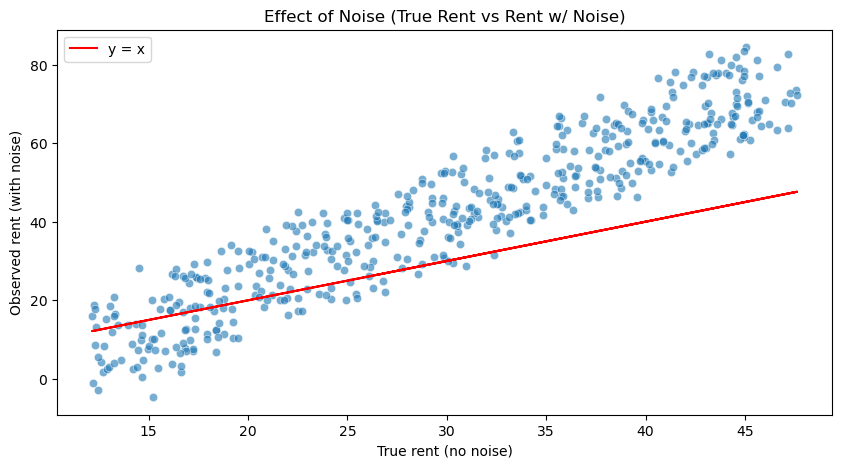

In [8]:
true_rent = 1.5 * df_summary['area'] + 2 * df_summary['bedrooms'] - 0.8 * df_summary['age'] + 5

plt.figure(figsize = (10, 5))
sns.scatterplot(x = true_rent, y = df_summary['rent'], alpha = 0.6)
plt.plot(true_rent, true_rent, color = 'red', label = 'y = x')
plt.title('Effect of Noise (True Rent vs Rent w/ Noise)')
plt.xlabel('True rent (no noise)')
plt.ylabel('Observed rent (with noise)')
plt.legend()
plt.savefig('eda3.png', dpi = 720)
plt.show()